In [1]:
using Phylo
using PhyloPlot
using CairoMakie

path = joinpath("..", "assets")
simple = open(t -> parsenewick(t, NamedPolytomousTree), joinpath(path, "simple.tree"))
complex = open(t -> parsenewick(t, NamedPolytomousTree), joinpath(path, "hummingbirds.tree"))

NamedTree with 126 tips and 1 root. Leaf names are Adelomyia_melanogenys, Aglaiocercus_coelestis, Aglaiocercus_kingi, Chalcostigma_herrani, Oxypogon_guerinii, ... [120 omitted] ... and Florisuga_mellivora

251 nodes: [Adelomyia_melanogenys, Aglaiocercus_coelestis, Aglaiocercus_kingi, Node 4, Node 5 ... 245 missing ... Node 251]

250 branches: [Branch{ManyRoots, String}(56, "Node 59", "Node 53", 0.10359464), Branch{ManyRoots, String}(35, "Node 38", "Node 36", 0.02788159), Branch{ManyRoots, String}(60, "Node 63", "Node 59", 0.02343217), Branch{ManyRoots, String}(220, "Node 223", "Node 222", 0.04006476), Branch{ManyRoots, String}(67, "Node 72", "Heliodoxa_aurescens", 0.11882236) ... 244 missing ... Branch{ManyRoots, String}(65, "Node 71", "Node 69", 0.00427061)]

Node records: "Adelomyia_melanogenys" => Dict{String, Any}() ... "Node 251" => Dict{String, Any}()


In [2]:
# f = Figure()
# ax = Axis(f[1,1])
# drawslicedicetreemap(simple)

# current_figure()

In [3]:
# f = Figure()
# ax = Axis(f[1,1])
# drawhvtree(simple)

# current_figure()

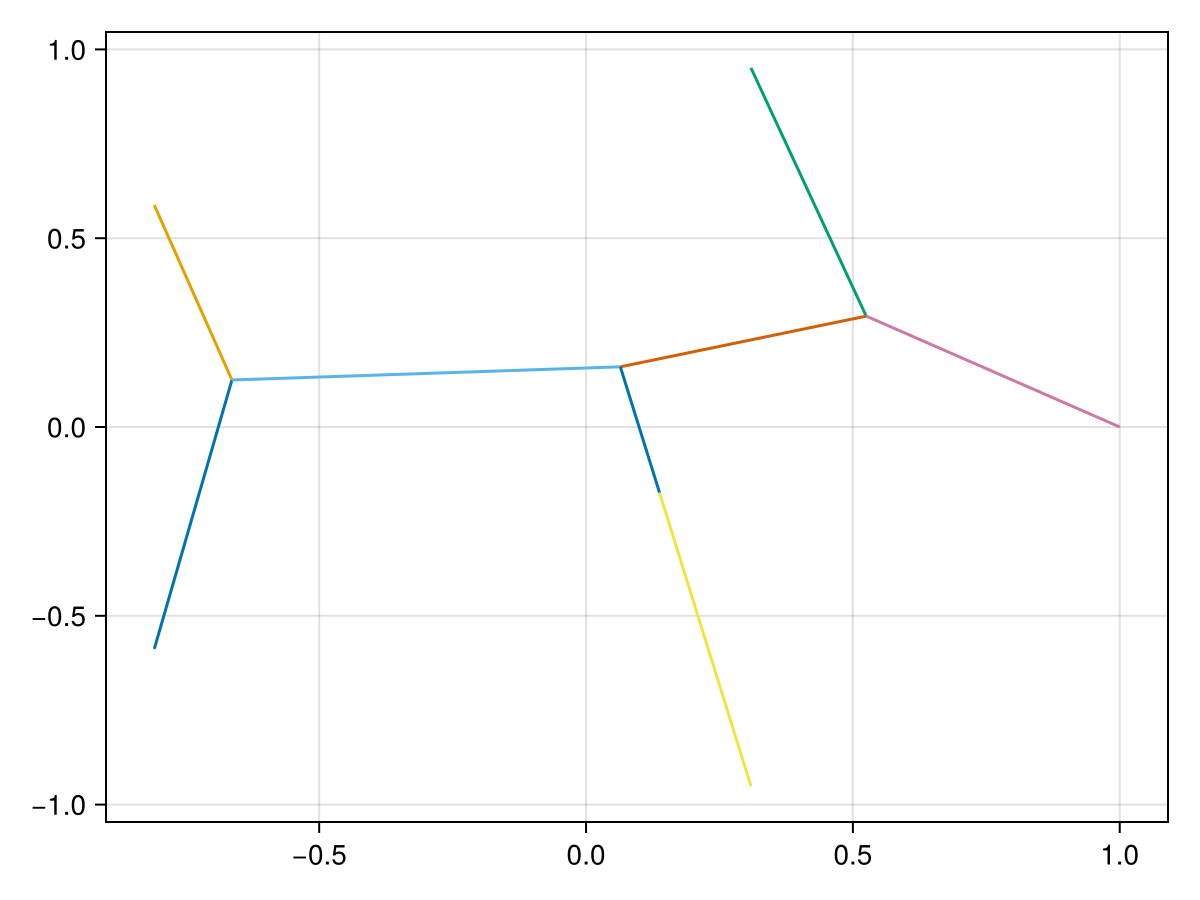

In [4]:
f = Figure()
ax = Axis(f[1,1])
drawbarycentrictree(simple)

current_figure()

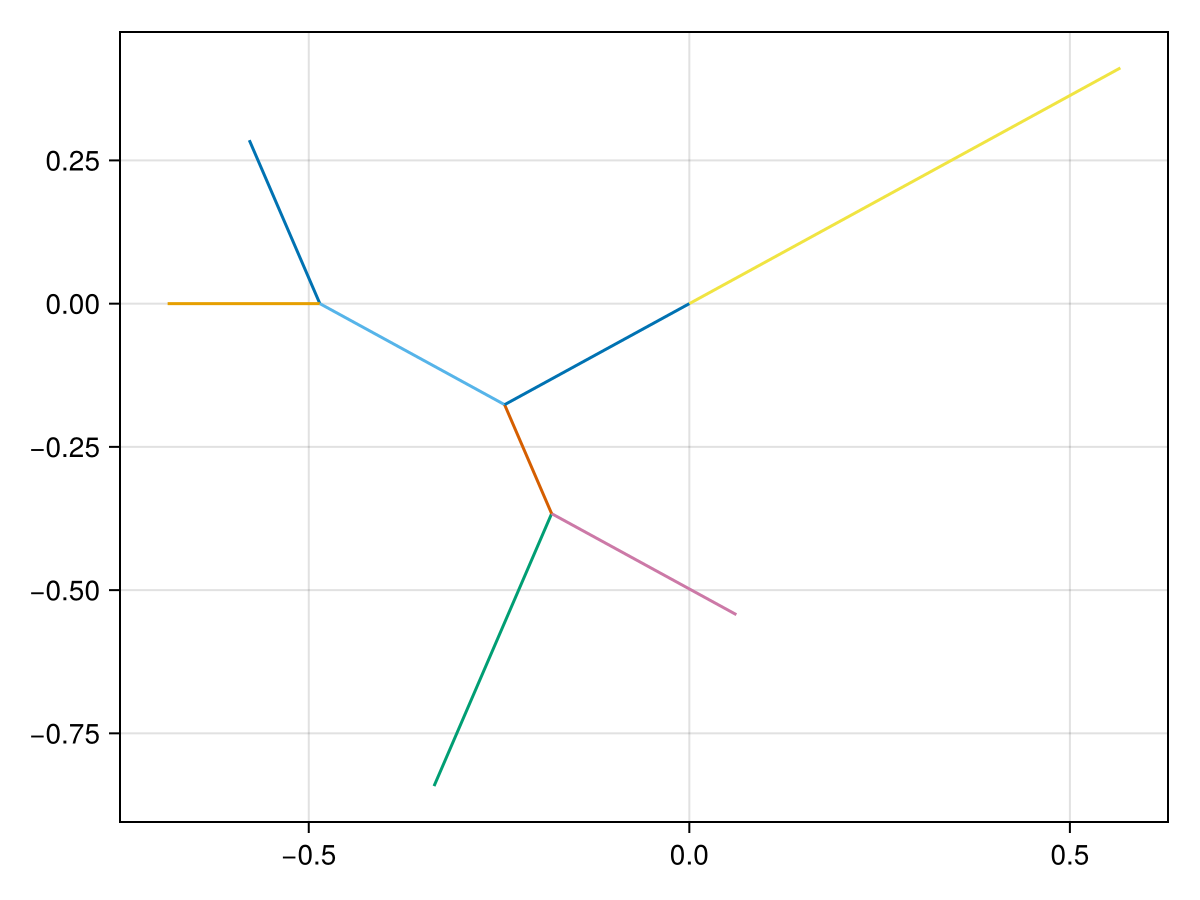

In [5]:
f = Figure()
ax = Axis(f[1,1])
drawradialtree(simple)

current_figure()